In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [3]:
# Define column names for UCI dataset
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load Cleveland data
df = pd.read_csv('../data/raw/uci_heart/processed.cleveland.data', 
                 names=column_names, 
                 na_values='?')

print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (303, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Dataset information
print("="*50)
print("DATASET INFORMATION")
print("="*50)
df.info()

print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50)
df.describe()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

STATISTICAL SUMMARY


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
# Missing values analysis
print("="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Percentage': missing_percent.values
}).sort_values('Missing_Count', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

MISSING VALUES ANALYSIS
   Column  Missing_Count  Percentage
11     ca              4    1.320132
12   thal              2    0.660066


Target Distribution:
target_binary
0    164
1    139
Name: count, dtype: int64

Percentage with disease: 45.87%


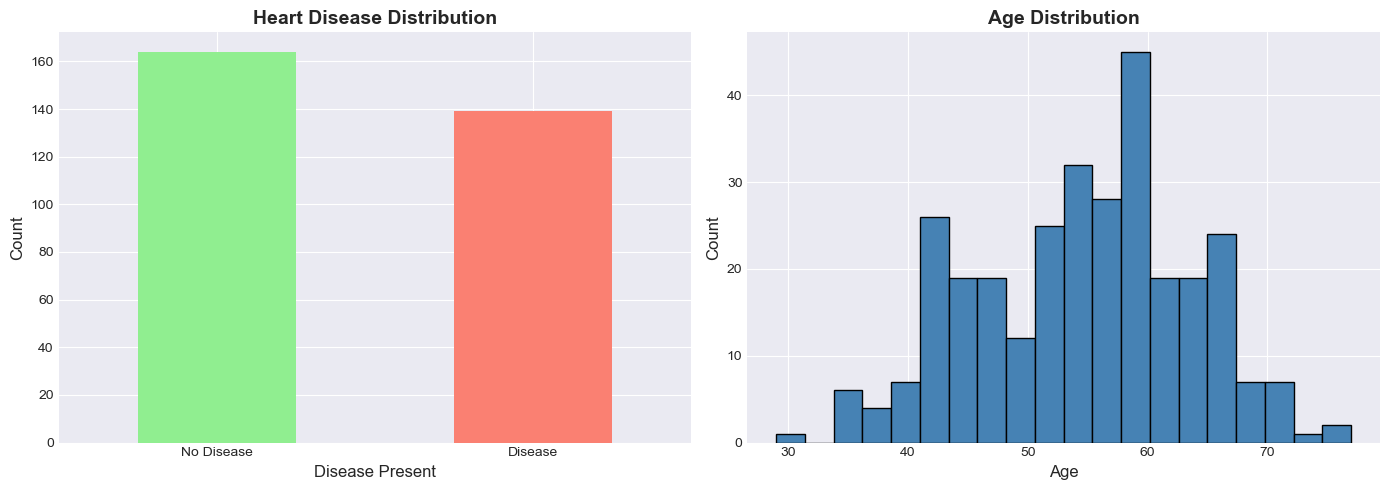

In [6]:
# Create binary target variable
df['target_binary'] = (df['target'] > 0).astype(int)

print("Target Distribution:")
print(df['target_binary'].value_counts())
print(f"\nPercentage with disease: {df['target_binary'].mean()*100:.2f}%")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Binary target
df['target_binary'].value_counts().plot(kind='bar', ax=axes[0], color=['lightgreen', 'salmon'])
axes[0].set_title('Heart Disease Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Disease Present', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No Disease', 'Disease'], rotation=0)

# Age distribution
df['age'].hist(bins=20, ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

CORRELATIONS WITH TARGET
target_binary    1.000000
target           0.830081
thal             0.525689
ca               0.460442
exang            0.431894
oldpeak          0.424510
cp               0.414446
slope            0.339213
sex              0.276816
age              0.223120
restecg          0.169202
trestbps         0.150825
chol             0.085164
fbs              0.025264
thalach         -0.417167
Name: target_binary, dtype: float64


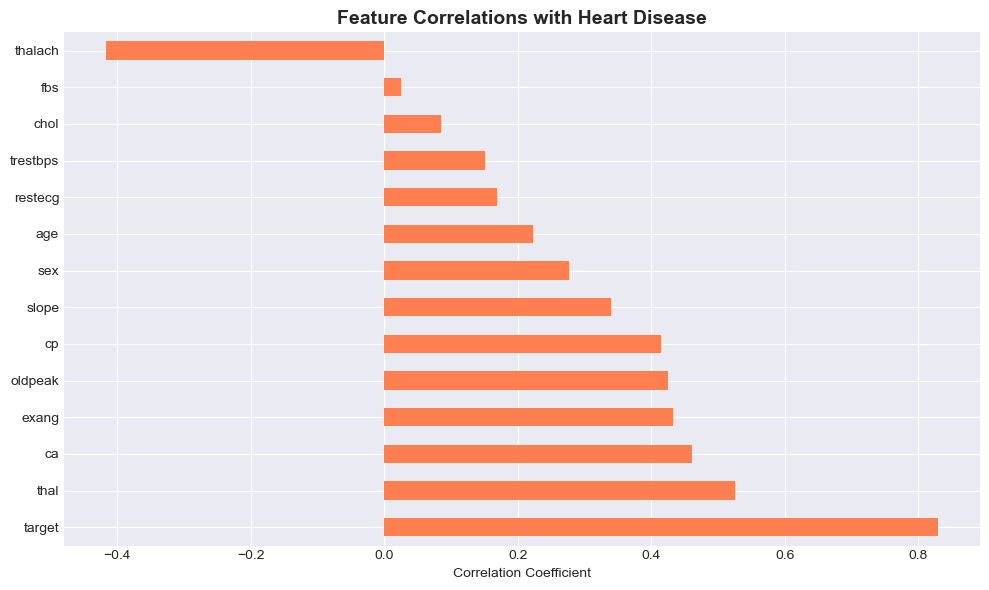

In [7]:
# Correlation with target
plt.figure(figsize=(10, 8))

correlation_matrix = df.corr()
target_corr = correlation_matrix['target_binary'].sort_values(ascending=False)

print("="*50)
print("CORRELATIONS WITH TARGET")
print("="*50)
print(target_corr)

# Visualize top correlations
target_corr[1:].plot(kind='barh', figsize=(10, 6), color='coral')
plt.title('Feature Correlations with Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()